In [1]:
# Step-5 Combine all subject csv into single unit
import os
import pandas as pd

data_path = './Step-2 Cleaned Data'
for test in ["Speech"]:

    # Create an empty DataFrame to store appended data
    appended_data = pd.DataFrame()

    for folder_name in os.listdir(data_path):
        subject_folder = os.path.join(data_path, folder_name)
        print(subject_folder +" - " +folder_name)

        for each_subject_test_folder in os.listdir(subject_folder):
            access_test = os.path.join(subject_folder, each_subject_test_folder + "/" + test)

            for filename in os.listdir(access_test):
                if filename.endswith(".csv"):
                    file_path = os.path.join(access_test, filename)

                    # Read the CSV file
                    df = pd.read_csv(file_path)
                    del df['TimeStamp']
                    df['Output'] = each_subject_test_folder.strip()

                    # Remove rows where any value is equal to 0
                    df = df[(df != 0).all(axis=1)]

                    # Check if df is not empty before concatenating
                    if not df.empty:
                        appended_data = pd.concat([appended_data, df], ignore_index=True)

    # Save the appended data to a single CSV file with "output" as "silentsd"
    if not os.path.exists("./Step-5 Combined CSV"):
        os.makedirs("./Step-5 Combined CSV", exist_ok=True)
        
    output_file_path = os.path.join("./Step-5 Combined CSV",f"{test}_data.csv")
    appended_data.to_csv(output_file_path, index=False)

    print(f"Data from all CSV files has been appended, and saved to {output_file_path}")

./Step-2 Cleaned Data\Akil - Akil
./Step-2 Cleaned Data\Jyaswanth Sai - Jyaswanth Sai
./Step-2 Cleaned Data\Prithivi Raaj - Prithivi Raaj
./Step-2 Cleaned Data\Santhosh - Santhosh
./Step-2 Cleaned Data\Venkatprasadh - Venkatprasadh
Data from all CSV files has been appended, and saved to ./Step-5 Combined CSV\Speech_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def z_score_normalization(data):
    mean_val = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    normalized_data = (data - mean_val) / std_dev
    return normalized_data

def remove_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    mask = z_scores <= threshold
    data_no_outliers = data[mask]
    return data_no_outliers

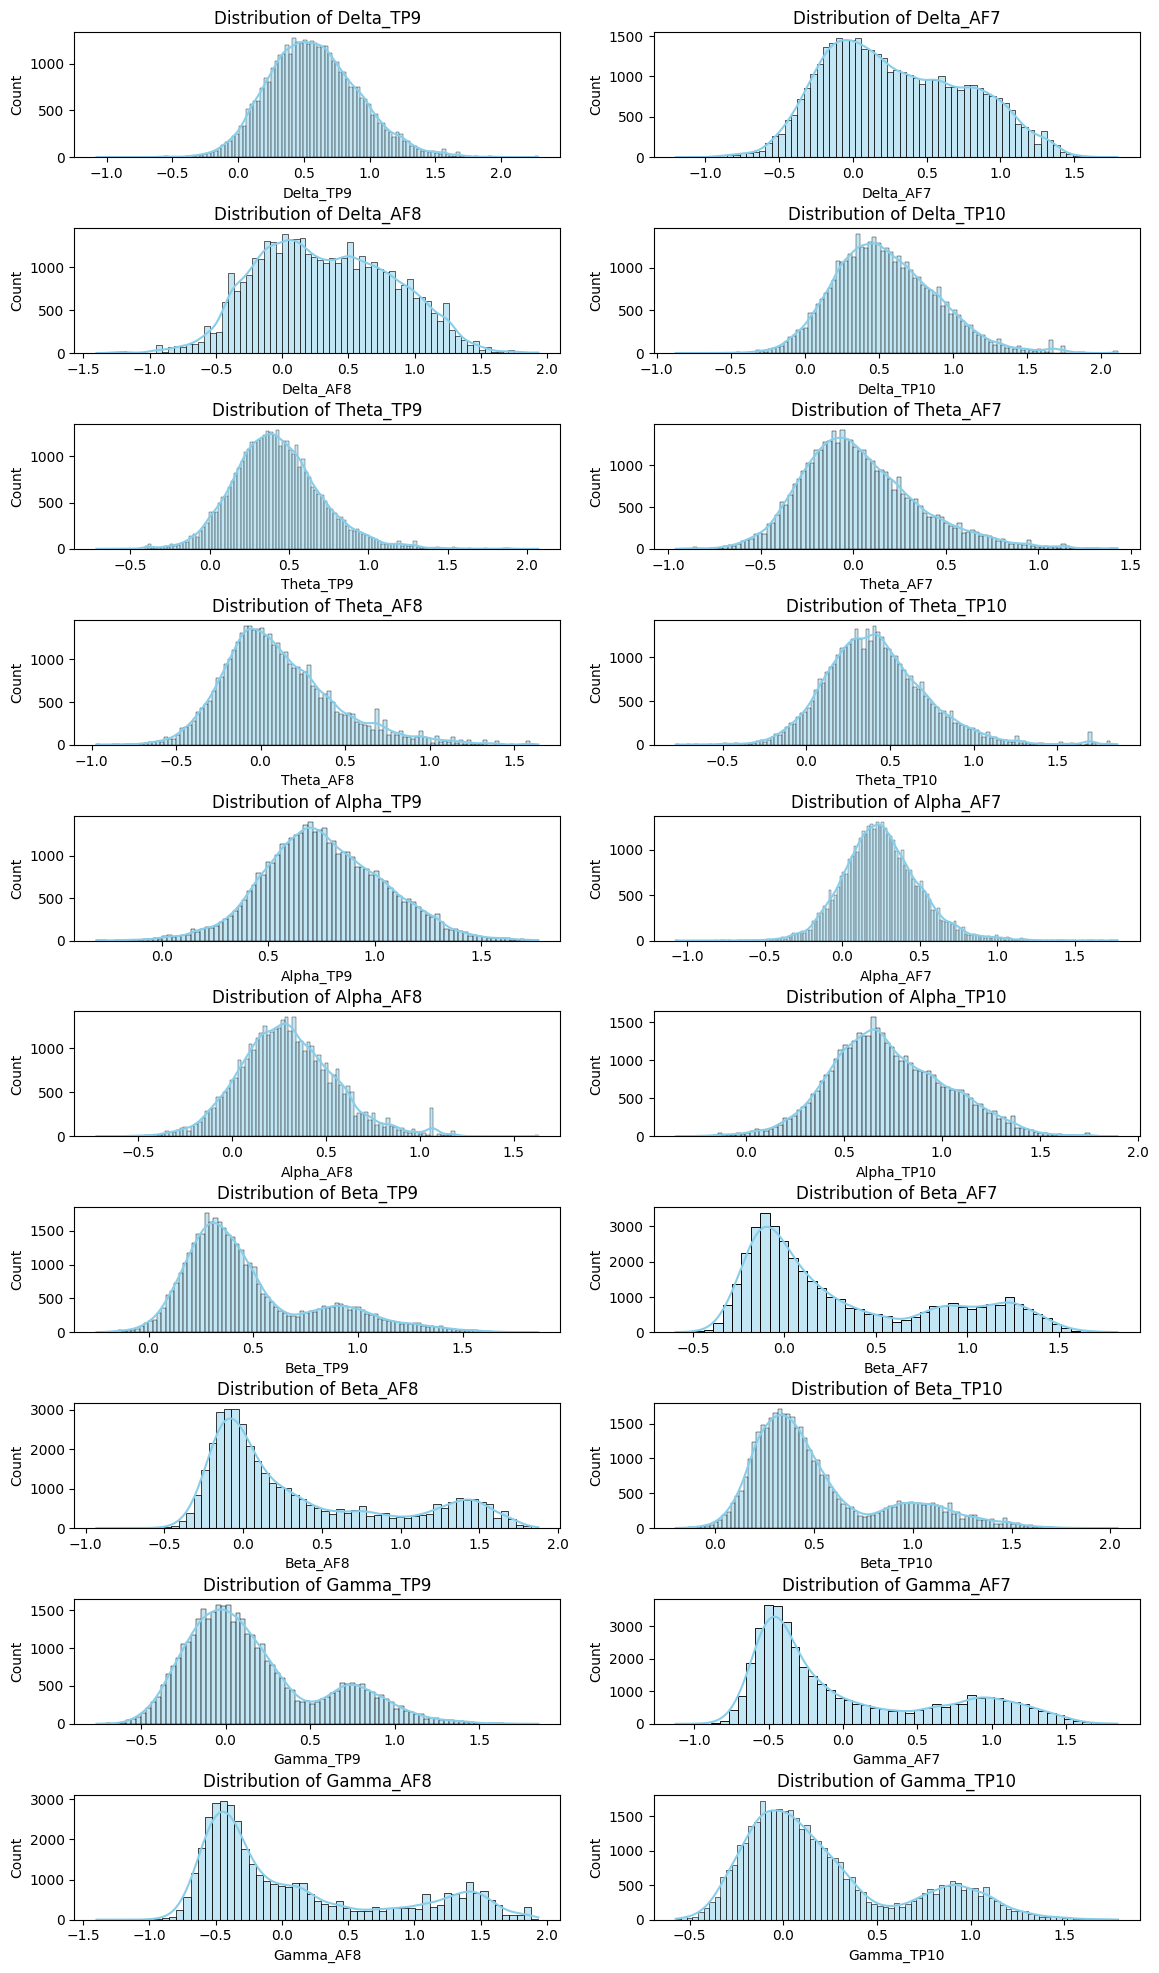

In [3]:
# Plot normal distribution for each numeric column before normalization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./Step-5 Combined CSV/Speech_data.csv")
numeric_columns = df.select_dtypes(include=np.number).columns

numerical_features = df.select_dtypes(include=['float64', 'int64'])

n_rows = len(numerical_features.columns) // 2 + len(numerical_features.columns) % 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, 2 * n_rows))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numerical_features.columns):
    sns.histplot(df[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

# Show the plot
plt.show()

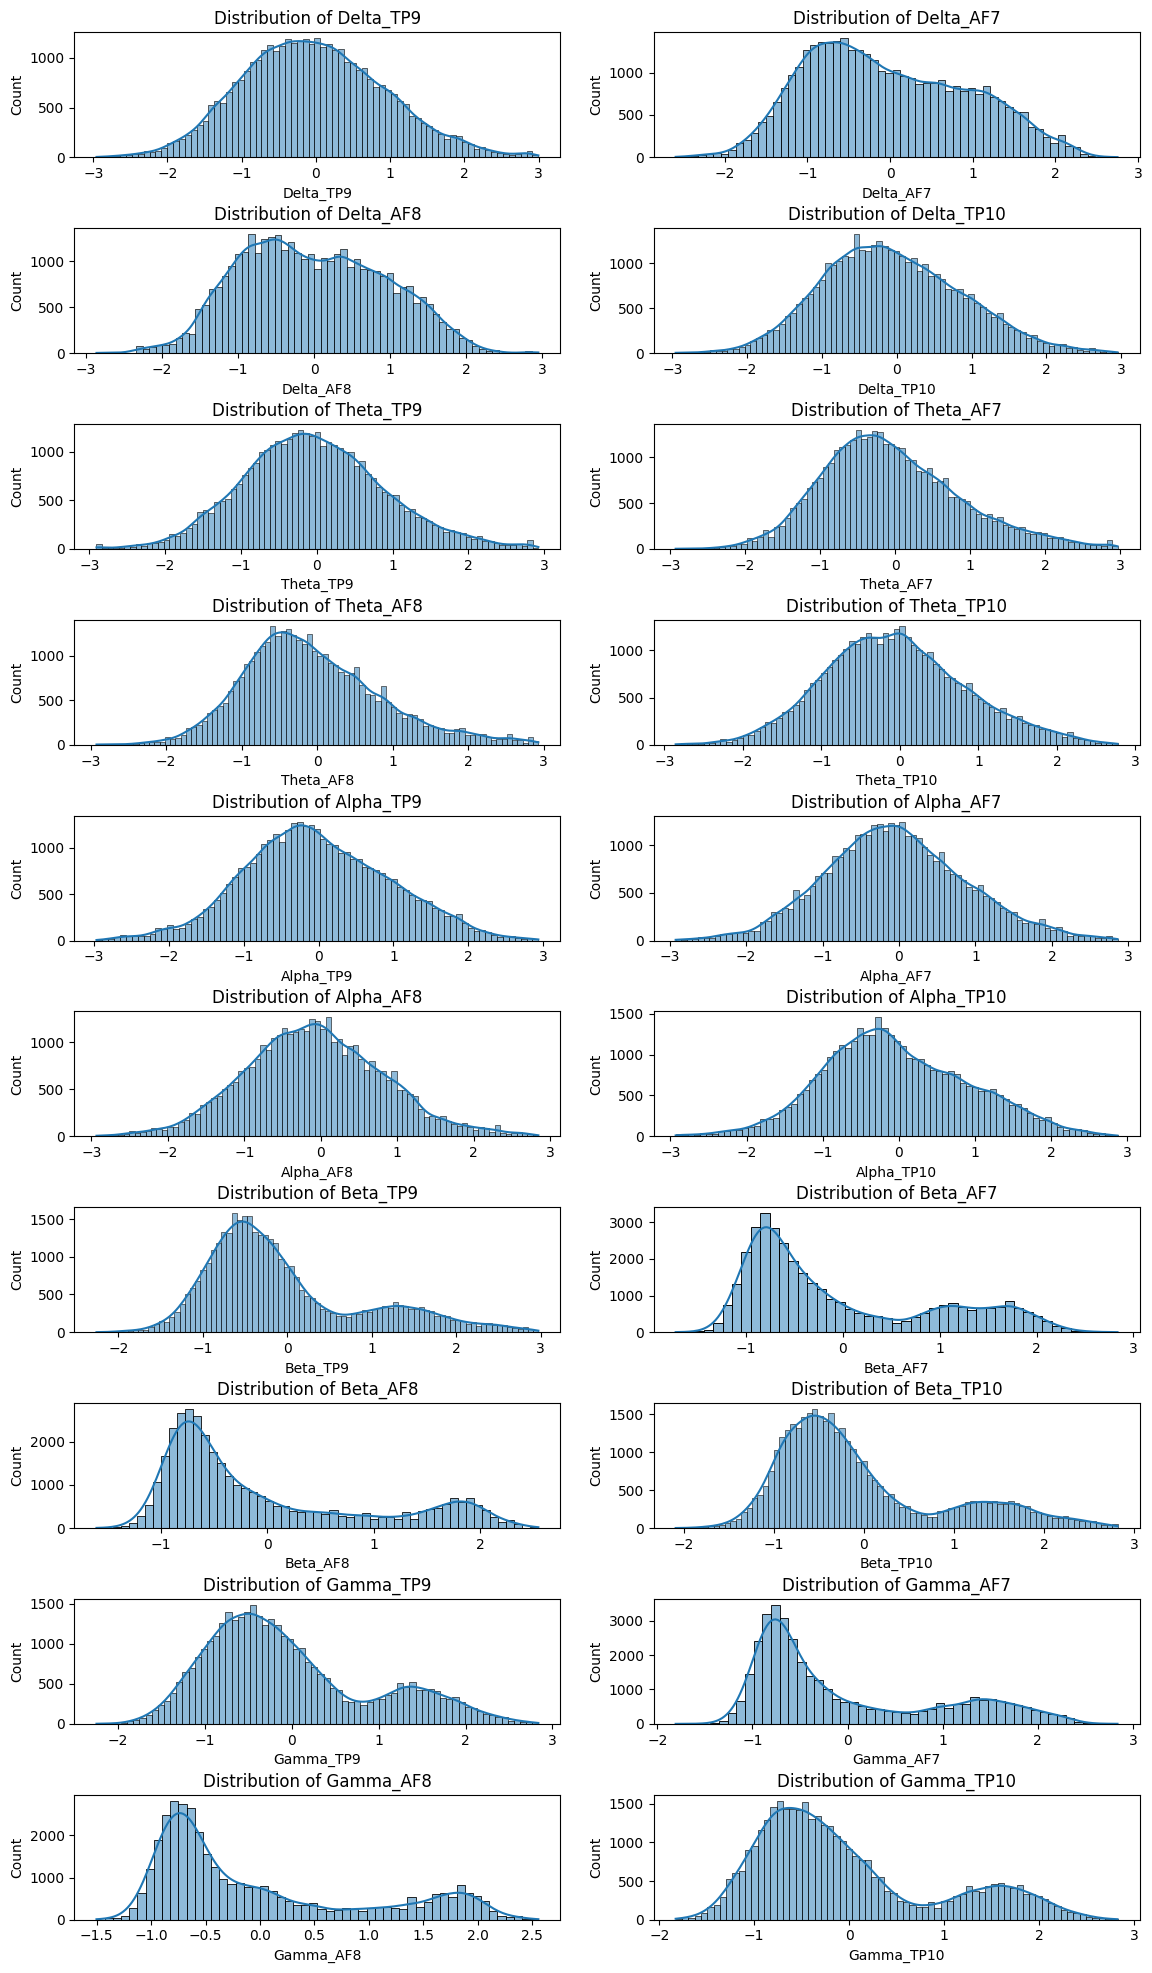

In [4]:
# Plot normal distribution for each numeric column after normalization and outlier removal
# Z-score normalization
df[numeric_columns] = z_score_normalization(df[numeric_columns])

# Remove outliers based on Z-score
for column in numeric_columns:
    df = df[df[column].isin(remove_outliers_z_score(df[column]))]

numerical_features = df.select_dtypes(include=['float64', 'int64'])

n_rows = len(numerical_features.columns) // 2 + len(numerical_features.columns) % 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, 2 * n_rows))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numerical_features.columns):
    sns.histplot(df[column], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

df.to_csv("./Step-5 Combined CSV/Normalized_Speech.csv", index=False)